In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try: # Currently, memory growth needs to be the same across GPUs 
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e: # Memory growth must be set before GPUs have been initialized print(e)
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

In [3]:
# 데이터 불러오기
(train_X,train_Y),(test_X,test_Y)=boston_housing.load_data()
print(len(train_X),len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [4]:
# 데이터 전처리 (정규화) - 평균을 0, 표준편차를 1
x_mean=train_X.mean(axis=0)
x_std=train_X.std(axis=0)
train_X-=x_mean
train_X /=x_std
test_X -= x_mean
test_X /= x_std

y_mean=train_Y.mean(axis=0)
y_std=train_Y.std(axis=0)
train_Y-=y_mean
train_Y /=y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [5]:
# Boston Housing Dataset 회귀 모델 생성
tf.random.set_seed(0)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=52,activation='relu',input_shape=(13,)),
    tf.keras.layers.Dense(units=39,activation='relu'),
    tf.keras.layers.Dense(units=26,activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='mse')
model.summary()
history=model.fit(train_X,train_Y,epochs=25,batch_size=32,validation_split=0.25)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
10/10 [==============================] - 2s 108ms/step - loss: 2.8046 - val_loss: 0.8600
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.5507 - val_loss: 0.5094
Epoch 3/25
10/10 [==============================] - 0s

['loss']
4/4 [==============================] - 0s 2ms/step - loss: 0.2609


(-1.825740279496296,
 3.0008527225512145,
 -1.825740279496296,
 3.0008527225512145)

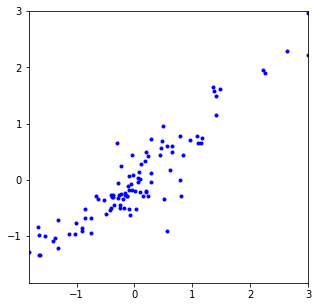

In [11]:
# 회귀 모델 평가
print(model.metrics_names)
model.evaluate(test_X,test_Y)

# 실제 주택 가격과 예측 주택 가격 시각화
pred_Y=model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y,pred_Y,'b.')
plt.axis([min(test_Y),max(test_Y),min(test_Y),max(test_Y)]) # 축 범위 설정 

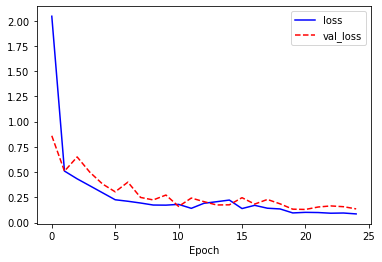

In [8]:
# 회귀 모델 학습 결과 시각화
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

In [12]:
# Boston Housing Dataset 회귀 모델 생성 (early stopping 추가)
tf.random.set_seed(0)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=52,activation='relu',input_shape=(13,)),
    tf.keras.layers.Dense(units=39,activation='relu'),
    tf.keras.layers.Dense(units=26,activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='mse')
model.summary()
history=model.fit(train_X,train_Y,epochs=25,batch_size=32,validation_split=0.25,
                 callbacks=[tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss')])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_5 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_6 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
10/10 [==============================] - 0s 14ms/step - loss: 2.8046 - val_loss: 0.8600
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.5507 - val_loss: 0.5094
Epoch 3/25
10/10 [==============================] - 0

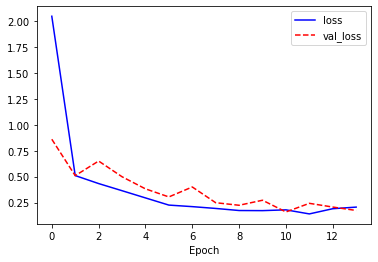

In [13]:
# 회귀 모델 학습 결과 시각화
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)